# РЕШАЮЩИЕ ДЕРЕВЬЯ ДЛЯ ЗАДАЧИ КЛАССИФИКАЦИИ

In [15]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

<ipython-input-1-23f9ac4017f6>:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')


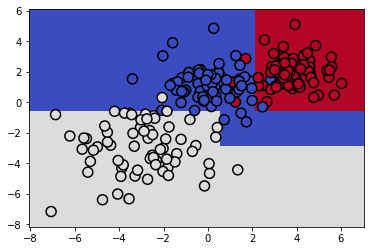

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

train_data, train_labels = make_blobs(n_samples=200, centers=[(0,1),(-3,-3),(4,2)], 
                                      n_features=2, random_state=RANDOM_SEED,
                                      cluster_std=(1.2,1.5,1,))

# Let’s write an auxiliary function that will return grid for further visualization.
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, 
                                  random_state=RANDOM_SEED)

# training the tree
clf_tree.fit(train_data, train_labels)

# some code to depict separating surface
xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), 
                                   yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap='coolwarm')
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100, 
            cmap='coolwarm', edgecolors='black', linewidth=1.5);

Вам предложен датасет с некоторыми характеристиками банкнот, по которым мы будем определять, является ли банкнота фальшивой или настоящей.

Параметры решающего дерева, которые понадобятся для решения задачи:

`max_depth` — максимальная глубина дерева.   
`max_features` — максимальное число признаков, по которым ищется лучшее разбиение в дереве. Это нужно потому, что при большом количестве признаков будет «дорого» искать лучшее (по критерию типа прироста информации) разбиение среди всех признаков.   
`min_samples_leaf` — минимальное число объектов в листе. У этого параметра есть понятная интерпретация: если он равен 5, то дерево будет порождать только те классифицирующие правила, которые верны как минимум для 5 объектов.   

In [5]:
data = pd.read_csv('./Unit_7_data/bill_authentication.csv')

## Задание 5.2.3
Обучите на предложенных данных решающее дерево. Целевой переменной здесь является переменная `Class`. Размер тестовой выборки возьмите за **0.2**, **random_state = 17** для разбиения и дерева. Максимальную глубину дерева примите за **3**, максимальное число признаков, по которым ищется лучшее разбиение в дереве — за **2**. Какое значение f1-score вы получили? Округлите до трёх знаков после точки-разделителя.

In [21]:
X, y= data.drop(columns='Class').values, data.Class.values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2, random_state = 17 )

In [22]:
model  = DecisionTreeClassifier(max_depth=3,max_features=2,random_state = 17)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=2, random_state=17)

In [23]:
y_pred = model.predict(X_test)
ans = f1_score(y_test,y_pred)

In [24]:
round(ans,3)

0.866

## Задание 5.2.4
Проклассифицируйте банкноту с вектором признаков ***2.04378,-0.38422,1.437292,0.76421.*** К какому классу она относится?

In [28]:
feats = np.array([[2.04378,-0.38422,1.437292,0.76421]])
model.predict(feats)[0]

0

# РЕШАЮЩИЕ ДЕРЕВЬЯ В ЗАДАЧЕ РЕГРЕССИИ

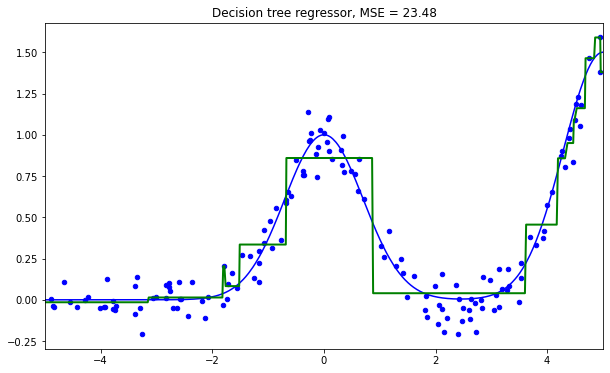

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

RANDOM_SEED = 139

n_train = 150        
n_test = 1000       
noise = 0.1

def f(x):
    x = x.ravel()
    return np.exp(-x ** 2) + 1.5 * np.exp(-(x - 5) ** 2)

def generate(n_samples, noise):
    X = np.random.rand(n_samples) * 10 - 5
    X = np.sort(X).ravel()
    y = np.exp(-X ** 2) + 1.5 * np.exp(-(X - 5) ** 2) + \
    np.random.normal(0.0, noise, n_samples)
    X = X.reshape((n_samples, 1))
    return X, y

X_train, y_train = generate(n_samples=n_train, noise=noise)
X_test, y_test = generate(n_samples=n_test, noise=noise)

from sklearn.tree import DecisionTreeRegressor

reg_tree = DecisionTreeRegressor(max_depth=4, random_state=RANDOM_SEED)

reg_tree.fit(X_train, y_train)
reg_tree_pred = reg_tree.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(X_test, f(X_test), "b")
plt.scatter(X_train, y_train, c="b", s=20)
plt.plot(X_test, reg_tree_pred, "g", lw=2)
plt.xlim([-5, 5])
plt.title("Decision tree regressor, MSE = %.2f" % np.sum((y_test - reg_tree_pred) ** 2))
plt.show()

БОРЬБА С ПЕРЕОБУЧЕНИЕМ (РЕГУЛЯРИЗАЦИЯ)

Приведём несколько возможных способов сделать алгоритм более обобщающим, т.е. менее заточенным под конкретную выборку:

- Задать порог по мере неопределённости $I(S) \leq \theta$: 
- Задать порог по размеру узла:$\left |S \right | \leq n$ 
- Задать порог на глубину: $Depth(T)=d$
- Задать порог на размер потомков $\left | S_L \right |\leq n_1$ & $\left | S_R \right | \leq n_2$, здесь $S$ — это узел дерева, $T$  — дерево, $\left | S_R \right | \leq n_2$ — количество элементов в узле, $S_L, S_R$ — соответственно правый и левый потомок узла $s$ .




# ЗАДАЧА О ПОТРЕБЛЕНИИ ТОПЛИВА

![](https://lms.skillfactory.ru/assets/courseware/v1/ed0db361d56c96e2781ff6dd393e616b/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/eastwood-downloading.png)

Потренируемся реализовывать задачу регрессии с помощью решающих деревьев на реальных данных. В данной задаче мы попробуем предсказать потребление топлива

## Задание 5.2.5
Обучите решающее дерево для регрессии на предложенных данных, размер тестовой выборки возьмите за **0.3**, **random_state = 42** для разбиения и дерева. Вычислите `RMSE`, округлите до *двух знаков* после точки-разделителя.

In [40]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [31]:
data = pd.read_csv('./Unit_7_data/petrol_consumption.csv')

In [35]:
X,y = data.drop(columns='Petrol_Consumption'),data.Petrol_Consumption

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3,random_state = 42)

In [37]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [39]:
y_pred = model.predict(X_test)

In [45]:
ans = np.sqrt(mean_squared_error(y_test,y_pred))
round(ans,2)

87.97

In [46]:
model.get_depth()

11

# 5.4. Практика